In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120

In [2]:
#
# Need to do something to make this not `import python.`
#
from psf import linear_static_wing_from_record
import crowdsource 

In [3]:
os.environ['DECAM_DIR'] = '../'

In [4]:
psfrec = fits.getdata("../c4d_160314_000848_ooi_g_v1.cat.fits", "S25_PSF")

In [5]:
variable_psf = linear_static_wing_from_record(psfrec[0], filter='g')

In [6]:
n_sources = 10**5
noise_level = 0.1
sim_image = crowdsource.sim_image(1000, 1000, n_sources, variable_psf, noise_level, nskyx=0, nskyy=0)

In [7]:
image, sources_x, sources_y, sources_flux = sim_image

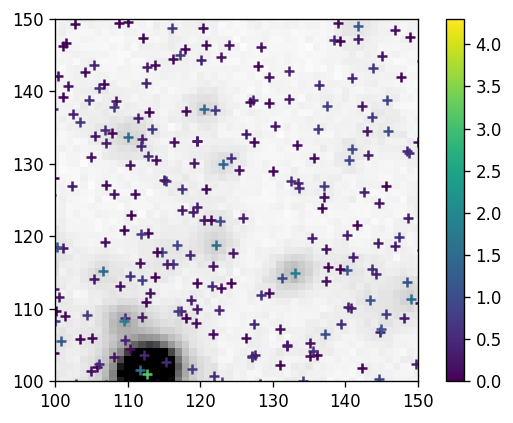

In [44]:
plt.imshow(image, cmap='gray_r', vmax=10)
plt.scatter(sources_y, sources_x, c=np.log10(sources_flux), marker='+', vmin=0, vmax=np.log10(20000))

plt.xlim(100,150)
plt.ylim(100,150)
plt.colorbar()

In [9]:
help(crowdsource.fit_im)

Help on function fit_im in module crowdsource:

fit_im(im, psf, weight=None, dq=None, psfderiv=True, nskyx=0, nskyy=0, refit_psf=False, fixedstars=None, verbose=False, miniter=4, maxiter=10, blist=None)



In [25]:
weight_image = 1/0.1 * np.ones_like(image)

fit_result = crowdsource.fit_im(image, variable_psf, weight_image, dq=np.zeros_like(image, dtype='i4'),
                                verbose=True, refit_psf=True)
sources_dict, sky_params, model_image, sky_model, refit_psf = fit_result

Iteration 1, found 3907 sources.
Iteration 2, found 1172 sources.
Iteration 3, found 3832 sources.
Iteration 4, found 2065 sources.
Iteration 5, found 788 sources.
Iteration 6, found 344 sources.
Iteration 7, found 151 sources.
Iteration 8, found 78 sources.


In [21]:
sources_dict.keys()

odict_keys(['x', 'y', 'flux', 'dx', 'dy', 'dflux', 'qf', 'rchi2', 'fracflux', 'fluxlbs', 'dfluxlbs', 'fwhm', 'flags', 'sky'])

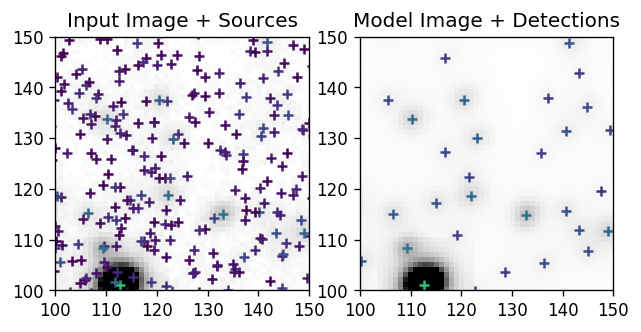

In [43]:
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray_r', vmin=0, vmax=10)
plt.scatter(sources_y, sources_x, c=np.log10(sources_flux), marker='+', vmin=0, vmax=np.log10(50000))

plt.xlim(100,150)
plt.ylim(100,150)
plt.title("Input Image + Sources")

plt.subplot(1,2,2)
plt.imshow(model_image, cmap='gray_r', vmin=0, vmax=10)
plt.scatter(sources_dict['y'], sources_dict['x'], c=np.log10(sources_dict['flux']),
            marker='+', vmin=0, vmax=np.log10(50000))

plt.xlim(100,150)
plt.ylim(100,150)
plt.title("Model Image + Detections")


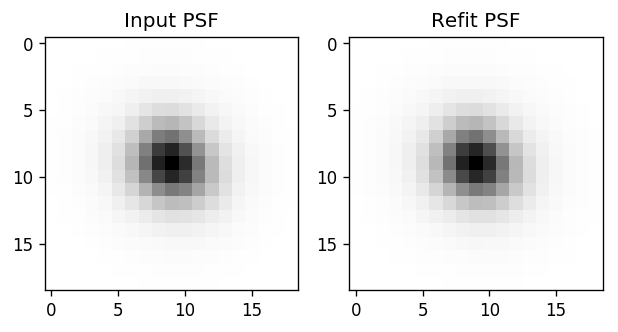

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(variable_psf(0,0, stampsz=19), cmap='gray_r')
plt.title("Input PSF")

plt.subplot(1, 2, 2)
plt.title("Refit PSF")
plt.imshow(refit_psf(0,0, stampsz=19), cmap='gray_r')


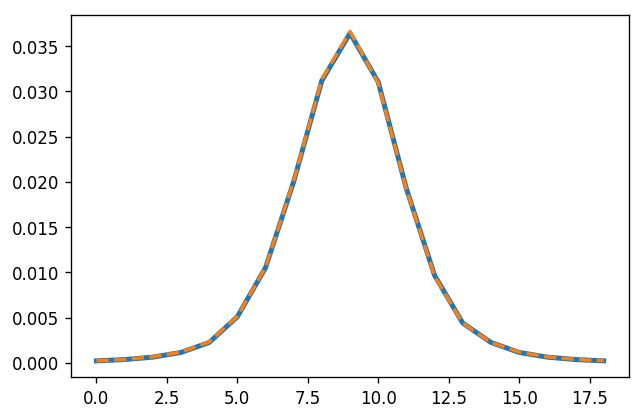

In [41]:
plt.plot(variable_psf(0,0, stampsz=19)[:,9], lw=3)

plt.plot(refit_psf(0,0, stampsz=19)[:,9], '--', lw=2)